In [1]:
'''
Equations referenced are from Fang and Oosterlee (2008)
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjV4Mu3nM72AhWJ_6QKHQ_fBwkQFnoECAMQAQ&url=http%3A%2F%2Fta.twi.tudelft.nl%2Fmf%2Fusers%2Foosterle%2Foosterlee%2FCOS.pdf&usg=AOvVaw3dgj0ljH4hQO920rT84DGN
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

In [2]:
def Black_Scholes_Call(S, K, r, vol, tau):
    """ 
    Black Scholes Model for European Call
    """
    d1 = (np.log(S / K) + (r + ((vol**2)/2.)*tau)) / (vol*np.sqrt(tau))
    d2 = d1 - vol*np.sqrt(tau)
    V = S * norm.cdf(d1) - np.exp(-r*tau) * K * norm.cdf(d2)
    
    return V

In [3]:
def chi(a, b, c, d, k):
    ''' Equation 22 '''
    bma = b-a
    uu  = k * np.pi/bma
    first = (k*np.pi) * ((d-a)/bma)
    second = (k*np.pi) * ((c-a)/bma)

    return (1/(1+np.power(uu,2))) * ( np.cos(first)*np.exp(d) -  np.cos(second)*np.exp(c) +
                uu*np.sin(first)*np.exp(d) - uu*np.sin(second)*np.exp(c) )

def psi(a, b, c, d, k):
    ''' Equation 23 '''
    bma = b-a
    uu = k * np.pi/bma

    if k == 0:
        return d -c
    else: 
        return (1/uu) * (np.sin(uu * (d-a)) - np.sin(uu * (c-a)))

def phi(u, r, sigma, T):
    ''' Assigment 3. GBM '''
    phi_temp = np.exp(1j * u*T * (r - 0.5 * np.power(sigma,2))  - 0.5 * np.power(sigma,2) * T * np.power(u,2))
    return phi_temp

def V(a,b,k):
    ''' Equation 24 '''
    return K*2/(b-a) *  (chi(a, b, 0, b, k) - psi(a, b, 0, b, k))

def F(u,a,b,k, x):
    ''' Equation 9 '''
    return np.real(phi(u, r, sigma, T) * (np.exp(1j * k * np.pi * (x-a)/(b-a))))

In [4]:
S0, K, r, sigma, T = 100, 110, 0.04, 0.3, 1
a = np.log(S0/K) + r - 12*np.sqrt(sigma*sigma*T)
b = np.log(S0/K) + r + 12*np.sqrt(sigma*sigma*T)

In [5]:
''' Equation 19 '''
fourier = []
x  = np.log(S0/K)

for i in range(64):
    u = i * np.pi/(b-a)
    V_temp = V(a,b,i)
    F_temp = F(u,a,b,i,x)
    
    if i == 0:
        F_temp = F_temp * 0.5
    
    fourier.append(V_temp*F_temp)

np.sum(fourier) * np.exp(-r * T)

9.625357828843875

In [6]:
def Cos(S0, K, N0):
    ''' Equation 19 '''
    
    fourier = np.zeros(N0)
    x  = np.log(S0/K)
    
    for i in range(N0):
        u = i * np.pi/(b-a)
        V_temp = V(a,b,i)
        F_temp = F(u,a,b,i, x)

        if i == 0:
            F_temp = F_temp * 0.5

        fourier[i]=(V_temp*F_temp)

    return np.sum(fourier) * np.exp(-r * T)

In [16]:
'''
Cos table
'''

N = [32, 64, 96, 128, 160, 192]
S = [100, 110, 120]

for n in N:
    cosy = []
    for s in S:
        
        cos = Cos(s, 110, n)  
        cosy.append(cos)
    print(f'{n} = {cosy[0]} {cosy[1]} {cosy[2]}')

32 = 9.625060999511218 15.12791492950838 21.788693807909265
64 = 9.625357828843875 15.128591111968078 21.78880833882963
96 = 9.625357828843875 15.128591111968078 21.78880833882963
128 = 9.625357828843875 15.128591111968078 21.78880833882963
160 = 9.625357828843875 15.128591111968078 21.78880833882963
192 = 9.625357828843875 15.128591111968078 21.78880833882963


In [10]:
dct = {}
for i in S:
    dct['list_%s' % i] = []

results = {}
N = [32, 64, 96, 128, 160, 192]
S = [100, 110, 120]

for s in S:
    x = []
    bs = Black_Scholes_Call(s, K, r, sigma, T)
    for n in N:
        begin = time.time()
        cos = Cos(s, 110, n)  
        end = time.time()-begin
        
        x.append([cos, abs(cos - bs), end])
    dct['list_%s' %s] = x
        

In [11]:
list100 = dct['list_100']
list110 = dct['list_110']
list120 = dct['list_120']

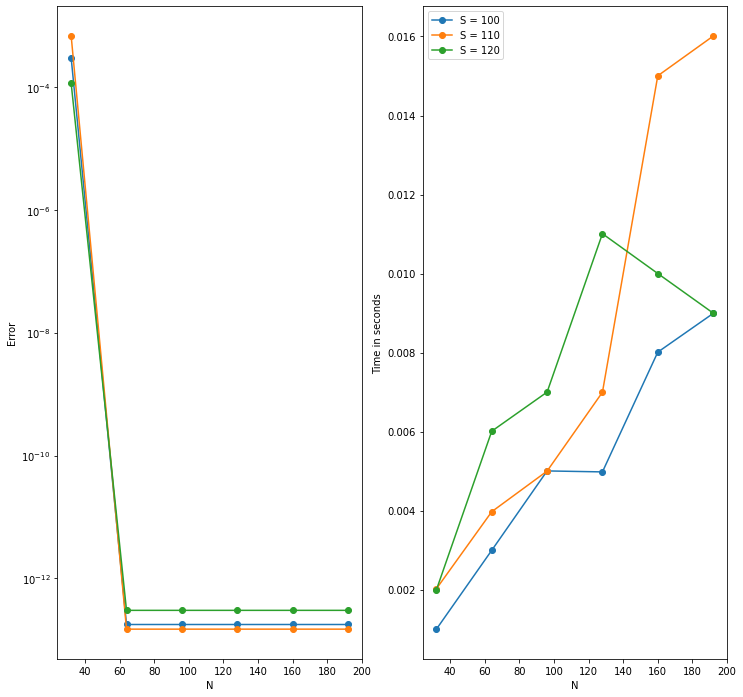

In [12]:
fig, axs = plt.subplots(1,2, figsize = (12,12))

axs[0].plot(N, np.array(list100).T[1], label = 'S = 100', linestyle = '-', marker = 'o')
axs[0].plot(N, np.array(list110).T[1], label = 'S = 110', linestyle = '-', marker = 'o')
axs[0].plot(N, np.array(list120).T[1], label = 'S = 120', linestyle = '-', marker = 'o')
axs[0].set_yscale('log')
axs[0].set_xlabel("N")
axs[0].set_ylabel("Error")


axs[1].plot(N, np.array(list100).T[2], label = 'S = 100', linestyle = '-', marker = 'o')
axs[1].plot(N, np.array(list110).T[2], label = 'S = 110', linestyle = '-', marker = 'o')
axs[1].plot(N, np.array(list120).T[2], label = 'S = 120', linestyle = '-', marker = 'o')
axs[1].set_xlabel("N")
axs[1].set_ylabel("Time in seconds")

plt.legend()
plt.show()

In [9]:
S = np.linspace(80, 140, 50)

In [155]:
fourier_S = []
Bs = []
for i in S:
    fourier_S.append(Cos(i, 110, 64))
    Bs.append(Black_Scholes_Call(i, K, r, sigma, T))

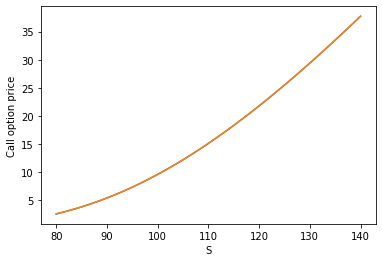

In [160]:
plt.plot(S, fourier_S, label = 'Fourier')
plt.plot(S, Bs, label = 'Analytical')
plt.ylabel('Call option price')
plt.xlabel('S')
plt.show()

In [39]:
'''
Without time
'''

dct = {}
for i in S:
    dct['list_%s' % i] = []

results = {}
N = [10, 15, 20, 25, 30, 35, 40, 45, 50, 64, 96, 128, 160, 192]
S = [100, 110, 120]

for s in S:
    x = []
    bs = Black_Scholes_Call(s, K, r, sigma, T)
    for n in N:
        begin = time.time()
        cos = Cos(s, 110, n)  
        end = time.time()-begin
        
        x.append([cos, abs(cos - bs), end])
    dct['list_%s' %s] = x

In [40]:
list100 = dct['list_100']
list110 = dct['list_110']
list120 = dct['list_120']

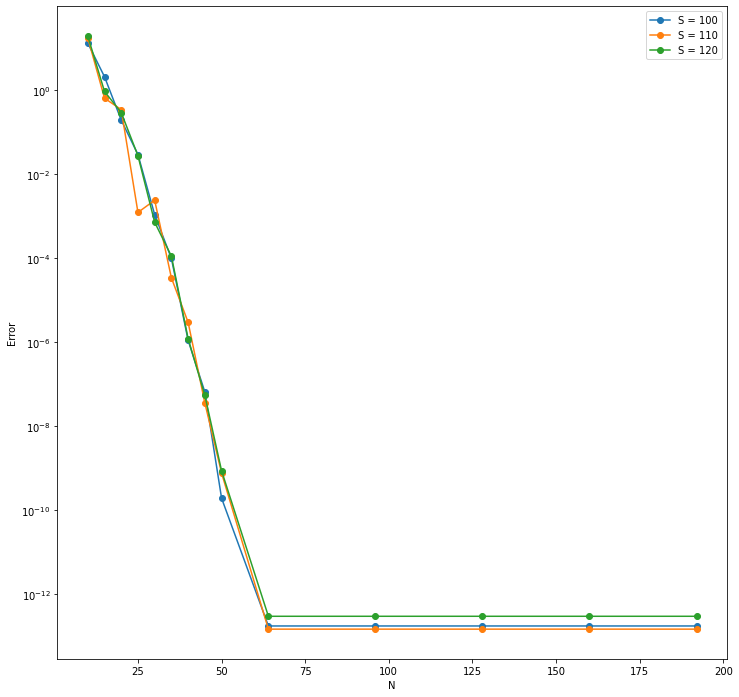

In [41]:
fig, axs = plt.subplots(1,1, figsize = (12,12))

axs.plot(N, np.array(list100).T[1], label = 'S = 100', linestyle = '-', marker = 'o')
axs.plot(N, np.array(list110).T[1], label = 'S = 110', linestyle = '-', marker = 'o')
axs.plot(N, np.array(list120).T[1], label = 'S = 120', linestyle = '-', marker = 'o')
axs.set_yscale('log')
axs.set_xlabel("N")
axs.set_ylabel("Error")


plt.legend()
plt.show()

In [38]:
np.arange(10,48,5)

array([10, 15, 20, 25, 30, 35, 40, 45])